# Ансамблевые методы машинного обучения
Метод машинного обучения, где несколько моделей обучаются для решения одной и той же проблемы и объединяются для получения лучших результатов называется ансамблевым методом. Основная предпосылка заключается в том, что результат работы нескольких моделей будет более точен, чем результат только одной модели.

Когда говорится об ансамблях, то вводится понятие слабого ученика(обычные модели вроде линейной регрессии или дерева решений). Множество слабых учеников являются строительными блоками для более сложных моделей. Объединение слабых учеников для улучшения качества модели, уменьшения смещения или разброса, называется сильным учеником.

### Виды ансамблевых методов
Наиболее популярными ансамблевыми методами являются: стекинг, бэггинг, бустинг.

Стекинг. Используется несколько разнородных слабых учеников. Их обучают и объединяют для построения прогноза, основанного на результатах различных слабых моделей.

Бэггинг. В этом случае однородные модели обучают на разных наборах данных и объединяют. Получают прогноз путём усреднения. Если использовать в качестве слабого ученика деревья решений, то получится случайный лес RandomForestClassifier / RandomForestRegressor.

Бустинг. При использовании данного метода несколько однородных моделей последовательно обучаются, исправляя ошибки друг друга.

Стекинг
Работа этого типа ансамблей довольно проста. На вход всех слабых прогнозаторов подаётся обучающий набор, каждый прогноз идёт к финальной модели, которая называется смеситель, мета-ученик или мета-модель, после чего та вырабатывает финальный прогноз.

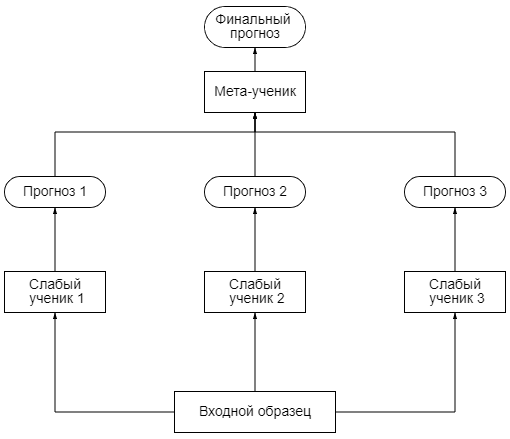

При обучении мета-модели используется приём удерживаемого набора. Сначала набор разделяется на 2 части. Слабые ученики обучаются на первой половине обучающего набора, затем на второй. Затем создаётся новый обучающий набор на основе прогнозов, сделанных на прогнозах первой и второй части набора. Таким образом, на каждый образец из входного набора приходится столько прогнозов, сколько слабых учеников в ансамбле (в примере на картинке три). Мета-модель учится прогнозировать значения на основе нового набора.

In [1]:
from sklearn.ensemble import StackingClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

data, target = load_breast_cancer(return_X_y=True)

estimators = [('lr', LogisticRegression()), ('dt', DecisionTreeClassifier())]
modelClf = StackingClassifier(estimators=estimators, final_estimator=SVC())

X_train, X_valid, y_train, y_valid = train_test_split(data, target, test_size=0.3, random_state=12)

modelClf.fit(X_train, y_train)
print(modelClf.score(X_valid, y_valid))

0.9415204678362573


c:\Users\Artvl\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Artvl\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

Бэггинг
Основная идея бэггинга заключается в том, чтобы обучить несколько одинаковых моделей на разных образцах. Распределение выборки неизвестно, поэтому модели получатся разными.

Для начала генерируется несколько бутстрэп-выборок. Бутстрэп - это случайный выбор данных из датасета и представление их в модель, затем данные возвращаются в датасет и процесс повторяется. После модели делают свои прогнозы на основе бутстрэп-выборок. В случае регрессии прогнозы просто усредняются. В случае же классификации применяется голосование.

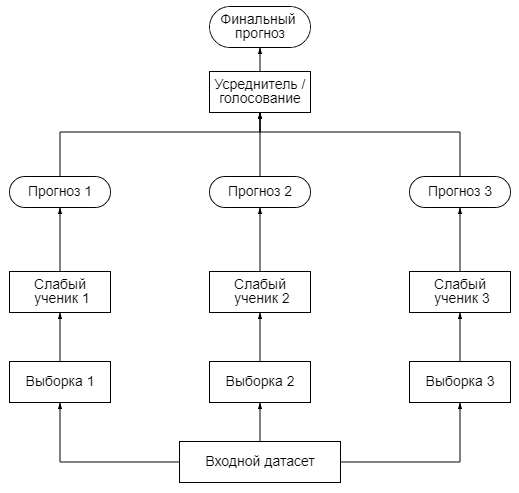

Если класс предсказывает большинство слабых моделей, то он получает больше голосов и данный класс является результатом предсказывания ансамбля. Это пример жёсткого голосования. При мягком голосовании рассматриваются вероятности предсказывания каждого класса, затем вероятности усредняются и результатом является класс с большой вероятностью.

In [13]:
from sklearn.ensemble import BaggingClassifier

data, target = load_breast_cancer(return_X_y=True)

modelClf = BaggingClassifier(estimator=LogisticRegression(), n_estimators=10, random_state=12)

X_train, X_valid, y_train, y_valid = train_test_split(data, target, test_size=0.3, random_state=12)

modelClf.fit(X_train, y_train)
print(modelClf.score(X_valid, y_valid))

0.9298245614035088


c:\Users\Artvl\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Artvl\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

Бустинг
Метод бустинга в чём то схож с методом бэггинга: берётся множество одинаковых моделей и объединяется, чтобы получить сильного ученика. Но разница заключается в том, что модели приспосабливаются к данным последовательно, то есть каждая модель будет исправлять ошибки предыдущей.

Базовые модели для бустинга - это модели с низким разбросом и высоким смещением. Например неглубокие деревья решений. Одна из причин такого выбора моделей - они требуют меньше вычислительных затрат. Ещё бустинг (в отличии от бэггинга) нельзя распараллелить.

Существует два наиболее распространённых алгоритма бустинга - адаптивный бустинг и градиентный бустинг. О них речь пойдёт ниже.

Адаптивный бустинг (AdaBoost)

Данный алгоритм сначала обучает первую базовую модель(допустим деревья решений) на тренировочном наборе. Относительный вес некорректно предсказанных значений увеличивается. На вход второй базовой модели подаются обновлённые веса и модель обучается, после чего вырабатываются прогнозы и цикл повторяется.

Результат работы AdaBoost - это средневзвешенная сумма каждой модели. Спрогнозированным значением ансамбля будет тот, который получает большинство взвешенный голосов

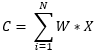

C - результат работы ансамбля, W - вес,  X - значение прогнозатора

Adaboost обновляет веса объектов на каждой итерации. Веса хорошо классифицированных объектов уменьшаются относительно весов неправильно классифицированных объектов. Модели, которые работают лучше, имеют больший вес в окончательной модели ансамбля.

При адаптивном бустинге используется итеративный метод (добавляем слабых учеников одного за другим, просматривая каждую итерацию, чтобы найти наилучшую возможную пару (коэффициент, слабый ученик) для добавления к текущей модели ансамбля) изменения весов. Он работает быстрее, чем аналитический метод.

In [15]:
from sklearn.ensemble import AdaBoostClassifier

data, target = load_breast_cancer(return_X_y=True)

modelClf = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=2), n_estimators=100, random_state=12)

X_train, X_valid, y_train, y_valid = train_test_split(data, target, test_size=0.3, random_state=12)

modelClf.fit(X_train, y_train)
print(modelClf.score(X_valid, y_valid))

0.9473684210526315


Градиентный бустинг

Градиентный бустинг обучает слабые модели последовательно, исправляя ошибки предыдущих. Результатом градиентного бустинга также является средневзвешенная сумма результатов моделей. Принципиальное отличие от Adaboost это способ изменения весов. Адаптивный бустинг использует итеративный метод оптимизации. Градиентный бустинг оптимизируется с помощью градиентного спуска.

Таким образом градиентный бустинг - обобщение адаптивного бустинга для дифференцируемых функций.

In [16]:
from sklearn.ensemble import GradientBoostingClassifier

data, target = load_breast_cancer(return_X_y=True)

modelClf = GradientBoostingClassifier(max_depth=2, n_estimators=150,
                                      random_state=12, learning_rate=1)

X_train, X_valid, y_train, y_valid = train_test_split(data, target, 
                                                      test_size=0.3, random_state=12)

modelClf.fit(X_train, y_train)
print(modelClf.score(X_valid, y_valid))

0.935672514619883
